# 1 &emsp; Creating Two Scenarios with Two Materials <a id='1'></a>
***

## 1.1 &emsp; Set the Working Folder and Import PV_ICE <a id='1.1'></a>

We learned this step in the previous lesson. To refresh additional explanation, just go back to the [tutorial](./01_First_Simulations.ipynb)!

In [1]:
import os
from pathlib import Path
import PV_ICE

testfolder = str(Path().resolve() / 'TEMP') # Path to the simulation folder.

baselinesfolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'baselines')  # Path to baselines and data.

print ("Your simulation will be stored in %s" % testfolder)
print ("Your baselines are stored in %s" % baselinesfolder)

Your simulation will be stored in /Users/mmendez/Documents/Postdoc/Software_dev/PV_ICE/docs/tutorials/tutorials_v2/TEMP
Your baselines are stored in /Users/mmendez/Documents/Postdoc/Software_dev/PV_ICE/PV_ICE/baselines


## 1.2 &emsp; Add Scenarios and Materials <a id='1.2'></a>

Let's do a comparison between `'silicon'` and `'glass'` in two different scenarios. First, we create a new simulation folder and load it with the `'baseline_modules_US.csv'` baseline. The first scenario, `'standard'`, will be the same as in Tutorial 1 but with two materials. In the second scenario, `'decadence'`, we will compare the decadence of these materials, we will modify the uploaded simulation baseline for this specific scenario. 

In [2]:
r1 = PV_ICE.Simulation(name='Simulation_1', path=testfolder)

r1.createScenario(name='standard', file= baselinesfolder + '/baseline_modules_US.csv')
r1.scenario['standard'].addMaterial('glass', file=baselinesfolder + '/baseline_material_glass.csv')
r1.scenario['standard'].addMaterial('silicon', file=baselinesfolder + '/baseline_material_silicon.csv' )
r1_standard_before = len(r1.scenario['standard'].data) # This line here is to count the amount of columns before the calculations, and compare it with the generated columns after calculating the massflow.

r1.createScenario('decadence', file=baselinesfolder + '/baseline_modules_US.csv')
r1.scenario['decadence'].addMaterial('glass', file=baselinesfolder + '/baseline_material_glass.csv')
r1.scenario['decadence'].addMaterial('silicon', file=baselinesfolder + '/baseline_material_silicon.csv')
r1_decadence_before = len(r1.scenario['decadence'].data) # This line here is to count the amount of columns before the calculations, and compare it with the generated columns after calculating the massflow.


path = /Users/mmendez/Documents/Postdoc/Software_dev/PV_ICE/docs/tutorials/tutorials_v2/TEMP


## 1.3 &emsp; Modify Parameter in the Scenarios <a id='1.3'></a>

PV_ICE has some dedicated functions that create changes based on improvements, but for this example we'll just be modifying values for the full column and comparing effects. To modify these columns, we use the `materialdata` method with the specific column name we want to change. In this case, we will be changing the following columns:
* Virgin material efficiency, `'mat_virgin_eff': Percentage of the virgin material is collected and passed to the next step in the manufacturing chain. The material not collected goes to virgin material waste.
* Material collected for recycling at the end of life (EOL), `'mat_virgin_eff'`: Percentage of material that will be recycled at the EOL.
* `'mat_massperm2'`: Find out what this is.
We will set some aleatory values to compare the effects in the `'decadence'` scenario.

In [4]:
r1.scenario['decadence'].data['mod_lifetime'] = 35 # Default in the baseline_US module lifetime starts at 12.5% in 1995, 21% in 2021, reaching 25% in 2050.

r1.scenario['decadence'].material['glass'].materialdata['mat_virgin_eff'] = 70.0  # Default in the baseline_material_glass is 60%.

r1.scenario['decadence'].material['silicon'].materialdata['mat_virgin_eff'] = 80.0 # Default in the baseline_material_silicon ranges from 20% plateauing in 30%.
r1.scenario['decadence'].material['silicon'].materialdata['mat_EOL_collected_Recycled'] = 100.0 # This one is not in the baseline!!
r1.scenario['decadence'].material['silicon'].materialdata['mat_massperm2'] = 22 # The minimum value in the baseline_material_silicon is 314 g!

Decadence is a pretty optimistic scenario if we compare it with the baselines! However, it is a great example to see the PV_ICE simulation capabilities.

## 1.4 &emsp; Run the Mass Flow Calculations on All Scenarios and Materials <a id='1.4'></a>

As we did before, we run the `'calculateMassFlow'` method, in this case we also run the `'aggregateResults'` which... what? 
VirginStock_glass_Simulation_2_standard_[Tonnes]

In [5]:
r1.calculateMassFlow()
r1.aggregateResults();

Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  decadence
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon


Wow those are a lot of calculations!! For further information on the mass flow outputs, see the [PV_ICE Data:Mass output documentation](https://pv-ice.readthedocs.io/en/latest/data.html#pv-ice-outputs).

In [9]:
r1_standard_now = len(r1.scenario['decadence'].data.columns)
r1_decadence_now = len(r1.scenario['decadence'].data.columns)

print('Your `standard` scenario has {} columns now! Before it had {}. We have added {} output columns!'.format(r1_standard_now, r1_standard_before, r1_standard_now - r1_standard_before))
print('Your `decadence` scenario has {} columns now! Before it had {}. We have added {} output columns!'.format(r1_decadence_now, r1_decadence_before, r1_decadence_now - r1_decadence_before))

Your `standard` scenario has 231 columns now! Before it had 56. We have added 175 output columns!
Your `decadence` scenario has 231 columns now! Before it had 56. We have added 175 output columns!


Let's try to unpack and undertand some of these results using the internal plotting function.

## 1.5 &emsp; Use Internal Plotting Functions to Plot Results <a id='1.5'></a>

As explained in the previous tutorial, you can get the keyword possibilities calling the method `plotScenariosComparison()` without any argument.

In [10]:
r1.plotScenariosComparison() 

Choose one of the keywords:  ['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50', 'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff', 'mod_Repair', 'mod_MerchantTail', 'mod_EOL_collection_eff', 'mod_EOL_pg0_resell', 'mod_EOL_pg1_landfill', 'mod_EOL_pg2_stored', 'mod_EOL_pg3_reMFG', 'mod_EOL_pg4_recycled', 'mod_EOL_reMFG_yield', 'mod_EOL_sp_reMFG_recycle', 'mod_EOL_pb1_landfill', 'mod_EOL_pb2_stored', 'mod_EOL_pb3_reMFG', 'mod_EOL_pb4_recycled', 'irradiance_stc', 'Area', 'Yearly_Sum_Area_disposedby_Failure', 'Yearly_Sum_Power_disposedby_Failure', 'Yearly_Sum_Area_disposedby_ProjectLifetime', 'Yearly_Sum_Power_disposedby_ProjectLifetime', 'Yearly_Sum_Area_disposed', 'Yearly_Sum_Power_disposed', 'landfilled_noncollected', 'Repaired_[W]', 'Repaired_Area', 'Resold_Area', 'Resold_[W]', 'Cumulative_Active_Area', 'Installed_Capacity_[W]', 'Status_BAD_Area', 'Status_BAD_[W]', 'Area_for_EOL_pathsG', 'Power_for_EOL_pathsG', 'Landfill_0', 'WeibullParams', 

Let's see the difference between `'standard'` and `'decadence'` scenarios if we compare their cumulative area disposed by failure.

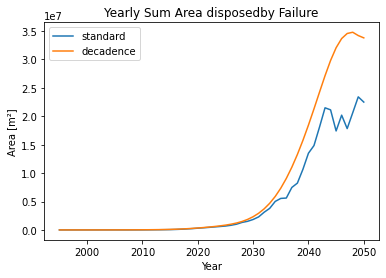

In [11]:
r1.plotScenariosComparison('Yearly_Sum_Area_disposedby_Failure')

Aha! We can see some difference between these two scenarios. The `'standard'` case represents the standard US baseline, whereas the `'decadence'` represents a more optimistic world (see [Section 2.3](#2.3)) so it makes sense that the disposed module area from year 2035 is much smaller than the default baseline scenario.

You can check out the material results you can plot by pulling out the keys with the following commands:
* `print(r2.scenario.keys())`: shows the scenarios that you created (in this example: `'standard'` and `'decadence'`)
* `print(r2.scenario['standard'].material.keys())`: returns the input materials that we loaded into the selected scenario
* `print(r1.scenario['standard'].material['glass'].materialdata.keys())`:

In [12]:
print(r1.scenario['standard'].material['glass'].materialdata.keys())

Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 'mat_PG3_ReMFG_target',
       'mat_ReMFG_yield', 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG', 'mat_L0',
       'mat_PG2_stored', 'mat_L1', 'mat_reMFG', 'mat_reMFG_mod_unyield',
       'mat_reMFG_target', 'mat_reMFG_untarget', 'mat_reMFG_yield',
       'mat_reMFG_unyield', 'mat_reMFG_all_unyields', 'mat_reMFG_2_recycle',
       'mat_L2', 'mat_recycled_PG4', 'mat_recycled_all', 'mat_recycled_target',
       'mat_L3', 'mat_recycled_yield', 'mat_L4', 'mat_EOL_Recycled_2_HQ',
       'mat_EOL_Recycled_2_OQ', 'mat_EOL_Recycled_HQ_into_MFG',
       'mat_EOL_Recycled_HQ_into_OU', 'mat_EnteringModuleManufacturing_total',
       'mat_UsedSuccessfullyinModuleManufacturing',
       'mat_LostinModuleManufact

Let's now compare how much `'glass'` and `'silicon'` is landfilled between the scenarios throughout the years. 

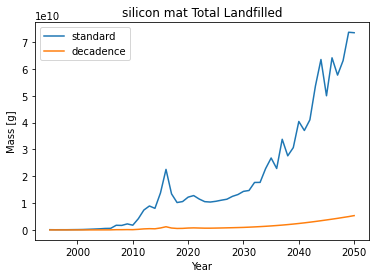

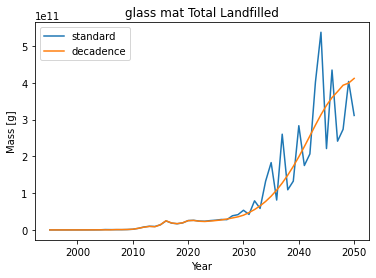

In [13]:
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')

Since we greatly modified the `'silicon'` material mass per m^2 (?) by reducing its weight down to 7% of its original mass, and increased the virgin material efficiency (from 30% to 80%!) we can see a great reduction in total landfilled silicon (about thirteen times smaller).

Conversely, since we barely changed the glass values (we just increased the virgin material efficiency by 10%), we can see how both scenarios follow a similar trend.

As you can see, it is very practical to be able to quickly visualize your simulation results to get an idea of what happens when we subject the scenarios under different material conditions!

Let's keep learning exploring Tutorial 3, an exciting case study where two PV modules are compared to understand potential tradeoffs in PV technology evolution by answering the following question: 

**Is it better to create a completely recyclable PV panel, or to extend the module lifetime?**